# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

## Load Data

In [2]:
loan_data_inputs_train = pd.read_csv('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\loan_data_targets_test.csv', index_col = 0)

## Explore Data

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,1
36159,0


In [5]:
loan_data_inputs_train.shape

(373028, 325)

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(93257, 325)

In [8]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

In [9]:
#select a limited set of input variables in a new dataframe, which is our dummy variable columns.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [10]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
# drop the variables with variable names in the list with reference categories. Or, it will cause dummy variable trap
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

## Fitting a Logistic Model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
reg =  LogisticRegression()

In [14]:
pd.options.display.max_rows = None

In [15]:
reg.fit(inputs_train,loan_data_targets_train)

C:\Users\scarl\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
reg.intercept_

array([-0.42337971])

In [17]:
reg.coef_

array([[ 0.99651907,  0.83077991,  0.63641834,  0.44489891,  0.27328108,
         0.06600234,  0.07658684,  0.08117882,  0.04509408,  0.08764242,
         0.06825036,  0.05171317,  0.08109888,  0.13880711,  0.12296755,
         0.17332139,  0.25711698,  0.25518142,  0.259529  ,  0.32374965,
         0.50480595,  0.0849453 , -0.00992145,  0.30836685,  0.19181064,
         0.1845042 ,  0.25008029,  0.06854836,  0.        ,  0.11535803,
         0.13328728,  0.10420856,  0.07449492,  0.13558161,  1.52641972,
         1.18402528,  1.09620354,  0.81673294,  0.57339128,  0.26254466,
        -0.03327477,  1.0215365 ,  0.62193476,  0.36556527,  0.14710758,
         0.04154846,  0.03458393,  0.09104619,  0.12195299,  0.1156842 ,
        -0.07500822, -0.09239781,  0.3265402 ,  0.17986111, -0.03218388,
         0.05461805, -0.06517164, -0.0736455 , -0.09083037, -0.05474766,
        -0.0365547 , -0.08621268,  0.19529943,  0.0246878 , -0.04172222,
         0.0112753 ,  0.14973881,  0.03977555,  0.0

In [18]:
# Stores the names of the columns of a dataframe in a variable.
feature_name = inputs_train.columns.values

In [19]:
summary_table = pd.DataFrame(columns = ['feature name'], data = feature_name)
# we turn the rows of coeffcient to a column by 'transpose'
summary_table['Coefficient'] = np.transpose(reg.coef_)

In [20]:
# move all table data one row down
summary_table.index = summary_table.index + 1
# Assigns values of the row with index 0 of the dataframe.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Sorts the dataframe by index.
summary_table = summary_table.sort_index()
summary_table

,feature name,Coefficient
0,Intercept,-0.423380
1,grade:A,0.996519
2,grade:B,0.830780
3,grade:C,0.636418
4,grade:D,0.444899
5,grade:E,0.273281
6,grade:F,0.066002
7,home_ownership:OWN,0.076587
8,home_ownership:MORTGAGE,0.081179
9,addr_state:NM_VA,0.045094


## Build a Logistic Regression Model with P-values

In [21]:
from sklearn import linear_model
import scipy.stats as stat

#### Calculating p values for each coefficient is univariate, meaning they take into account the impact of each feature to outcome as if there is no other features. However, the impact of all features on outcome is collective rather than independent. Therefore, calculating p-value is not good. The good method is to alter the .fit() from the LogisticRegression class.

In [22]:
from sklearn import linear_model
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# from chat gpt
class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        # 使用 L2 正则化来缓解共线性问题
        self.model = linear_model.LogisticRegression(penalty='l2', *args, **kwargs)

    def fit(self, X, y):
        # 确保 X 是数值型
        X = np.asarray(X, dtype=np.float64)

        # 处理缺失值
        imputer = SimpleImputer(strategy='mean')
        X = imputer.fit_transform(X)
        
        # 标准化特征
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
        # 降维以避免奇异矩阵
        pca = PCA(n_components=min(X.shape[1], X.shape[0] - 1))  # 降到合适的维度
        X = pca.fit_transform(X)

        # 确保 y 是 1D 数组
        y = np.asarray(y).ravel()
        
        # 拟合逻辑回归模型
        self.model.fit(X, y)

        #### 获取模型的 p-value ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)  # Fisher 信息矩阵
        
        # 处理 F_ij 是奇异矩阵的情况
        try:
            Cramer_Rao = np.linalg.inv(F_ij)  # Inverse 信息矩阵
        except np.linalg.LinAlgError:
            raise ValueError("Fisher Information Matrix 是奇异矩阵，无法求逆。请检查数据的共线性或其他问题。")
        
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates  # 每个模型系数的 z-score
        p_values = [stats.norm.sf(abs(x)) * 2 for x in z_scores]  # 双尾检验

        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

# 示例使用
# reg = LogisticRegression_with_p_values()
# reg.fit(inputs_train, loan_data_targets_train)


In [23]:
reg = LogisticRegression_with_p_values()

In [24]:
inputs_train = inputs_train.astype(float)

In [25]:
reg.fit(inputs_train,loan_data_targets_train)

In [26]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,2.563510e+00
1,grade:A,-2.444231e-03
2,grade:B,2.666378e-01
3,grade:C,1.638804e-01
4,grade:D,-1.126865e-01
5,grade:E,2.621473e-01
6,grade:F,3.629595e-02
7,home_ownership:OWN,-1.032886e-01
8,home_ownership:MORTGAGE,4.187335e-02
9,addr_state:NM_VA,-2.454884e-02


In [27]:
p_values = reg.p_values

In [28]:
# np.nan is a placeholder
p_values = np.append(np.nan, np.array(p_values))

In [29]:
summary_table['p_values'] = p_values

In [30]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.563510e+00,NaN
1,grade:A,-2.444231e-03,4.565114e-01
2,grade:B,2.666378e-01,0.000000e+00
3,grade:C,1.638804e-01,0.000000e+00
4,grade:D,-1.126865e-01,1.370078e-158
5,grade:E,2.621473e-01,0.000000e+00
6,grade:F,3.629595e-02,5.756808e-17
7,home_ownership:OWN,-1.032886e-01,4.094078e-128
8,home_ownership:MORTGAGE,4.187335e-02,3.636337e-20
9,addr_state:NM_VA,-2.454884e-02,5.511283e-07


In [31]:
summary_table.to_excel('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\summary_table.xlsx', index = True)

#### Even though some p-value is greater than 0.05, other dummy variables in the same category is statistically significant. Therefore, we keep that variable

In [32]:
# take only the dummy variables we found significant, including the reference dummy variable
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [33]:
# keep the reference categories of the dummy variables we found significant
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [34]:
# statistically significant dummy variables
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [35]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

In [36]:
feature_name = inputs_train.columns.values

In [37]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,2.561167e+00
1,grade:A,2.672909e-01
2,grade:B,4.869792e-02
3,grade:C,3.336132e-01
4,grade:D,3.297053e-03
5,grade:E,7.204700e-02
6,grade:F,-8.311421e-02
7,home_ownership:OWN,4.808191e-02
8,home_ownership:MORTGAGE,8.527337e-02
9,addr_state:NM_VA,-1.529037e-01


In [38]:
# add the 'p_values' just as before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.561167e+00,NaN
1,grade:A,2.672909e-01,0.000000e+00
2,grade:B,4.869792e-02,5.583298e-30
3,grade:C,3.336132e-01,0.000000e+00
4,grade:D,3.297053e-03,4.521684e-01
5,grade:E,7.204700e-02,7.125006e-62
6,grade:F,-8.311421e-02,2.012711e-81
7,home_ownership:OWN,4.808191e-02,1.663636e-25
8,home_ownership:MORTGAGE,8.527337e-02,7.500572e-73
9,addr_state:NM_VA,-1.529037e-01,1.725186e-226


In [39]:
summary_table.to_excel('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\final_summary_table.xlsx', index = True)

#### Interpretation of the coefficients in the PD model:
#### eg. odds(Y=1|grade=D)/odds(Y=1|grade=G) = e^beta_D, where grade=G is the reference category, Y=1 means that borrower will not default.

# PD Model Validation (Test)

## Out-of-sample validation

In [40]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [41]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [42]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


In [43]:
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test

C:\Users\scarl\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### 'predict' method returns predicted class(0/1,good/bad) and the 'predict_proba' method returns all probabilities to belong to each of the class

In [44]:
# obtain the raw probability perdiction
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

C:\Users\scarl\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [45]:
y_hat_test_proba

array([[0.09230767, 0.90769233],
       [0.08358607, 0.91641393],
       [0.15274643, 0.84725357],
       ...,
       [0.07993926, 0.92006074],
       [0.10177044, 0.89822956],
       [0.12521098, 0.87478902]])

In [46]:
y_hat_test_proba[:][:,1]

array([0.90769233, 0.91641393, 0.84725357, ..., 0.92006074, 0.89822956,
       0.87478902])

In [47]:
y_hat_test_proba = y_hat_test_proba[:][:,1]

In [48]:
loan_data_targets_test_temp = loan_data_targets_test

In [49]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [50]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp,pd.DataFrame(y_hat_test_proba)],axis = 1)

In [51]:
df_actual_predicted_probs.shape

(93257, 2)

In [52]:
df_actual_predicted_probs.columns = ['loan_data_targets_test','y_hat_test_proba']

In [53]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [54]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.907692
288564,1,0.916414
213591,1,0.847254
263083,1,0.898088
165001,1,0.851194


## Accurary and Area under the Curve

In [55]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba']>tr,1,0)

In [56]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,6764,1853
1,65851,18789


In [57]:
# getting percentages
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], 
            rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.072531,0.019870
1,0.706124,0.201475


In [58]:
# Calculate Accuracy of the model, which is the sum of the diagonal rates.
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], 
             rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0]

+ (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], 
               rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.20147549245633037

#### When tr = 0.5, everyone is predicted to be a good borrower. When tr = 0.75, lots of people who defualt are predcited to be good borrowers by model, thus indicating high false positive rates but with high accuracy. When tr = 0.9, the false positive rate decreases and with , but false negative increases a lot, meaning that many people who do not default are predicted to default. The criteria is too strict, and bank are having less business. However, giving loans (have business) and accuracy are both important. Thereofore, overal accuracy is not the universal measure of PD model. 

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

In [60]:
# ‘roc_curve' returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99988395, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.18147448e-05, 1.53591682e-04, ...,
        9.99834594e-01, 9.99834594e-01, 1.00000000e+00]),
 array([       inf, 0.95893619, 0.95160716, ..., 0.73322675, 0.73275148,
        0.7147155 ]))

In [61]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

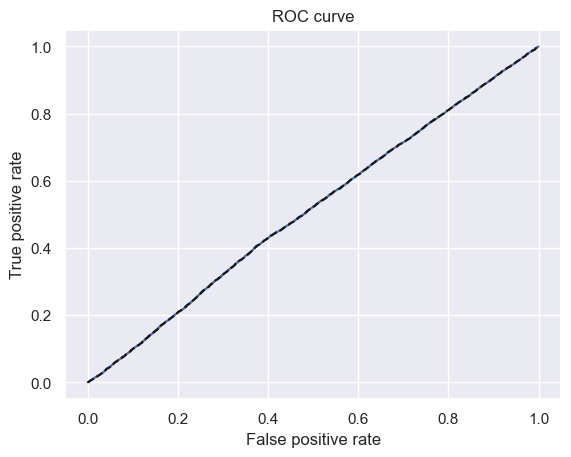

In [63]:
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,linestyle = '--',color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [64]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.5125638430857102

## Gini and Kolmogorov-Smirnovm

#### Gini coefficient: measure the inequality between nondefault(good) or default(bad) borrowers from the population. Gini coefficient is measured by the cumulative % of defaulted borrowers as a function of the cumulative % of all borrowers. Gini coefficient is the percentage of the area above the secondary diagonal line and the curve and the area of upper left triangle. The greater the area, the better the model.

#### Kolmogorov_Smirnovm coefficient shows to what extent the model separates the actual good borrowers from the actual bad borrowers. It is measured by looking at cumulative distribution of actual good borrowers and actual bad borrowers with respect to the estimated probability of being good or bad by model. It is the maximum difference between the cumulative distribution functions of good and bad borrowers. The greater the difference, the better the model.

In [66]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [67]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
409252,1,0.714716,0
246253,1,0.721975,0
257866,1,0.723179,0
303235,1,0.724703,0
306340,1,0.725240,0


In [68]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
19109,1,0.955275,1
39572,1,0.955426,1
39646,1,0.956590,1
39445,1,0.957251,1
122654,1,0.958936,1


In [69]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [70]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,409252,1,0.714716,0
1,246253,1,0.721975,0
2,257866,1,0.723179,0
3,303235,1,0.724703,0
4,306340,1,0.725240,0


In [71]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [72]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,409252,1,0.714716,0,1,1,0
1,246253,1,0.721975,0,2,2,0
2,257866,1,0.723179,0,3,3,0
3,303235,1,0.724703,0,4,4,0
4,306340,1,0.725240,0,5,5,0


In [78]:
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] /(df_actual_predicted_probs.shape[0])
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate the cumulative percentage of 'bad'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [79]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,409252,1,0.714716,0,1,1,0,0.000011,0.000012,0.0
1,246253,1,0.721975,0,2,2,0,0.000021,0.000024,0.0
2,257866,1,0.723179,0,3,3,0,0.000032,0.000035,0.0
3,303235,1,0.724703,0,4,4,0,0.000043,0.000047,0.0
4,306340,1,0.725240,0,5,5,0,0.000054,0.000059,0.0


In [80]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,19109,1,0.955275,1,93253,84636,8617,0.999957,0.999953,1.0
93253,39572,1,0.955426,1,93254,84637,8617,0.999968,0.999965,1.0
93254,39646,1,0.956590,1,93255,84638,8617,0.999979,0.999976,1.0
93255,39445,1,0.957251,1,93256,84639,8617,0.999989,0.999988,1.0
93256,122654,1,0.958936,1,93257,84640,8617,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

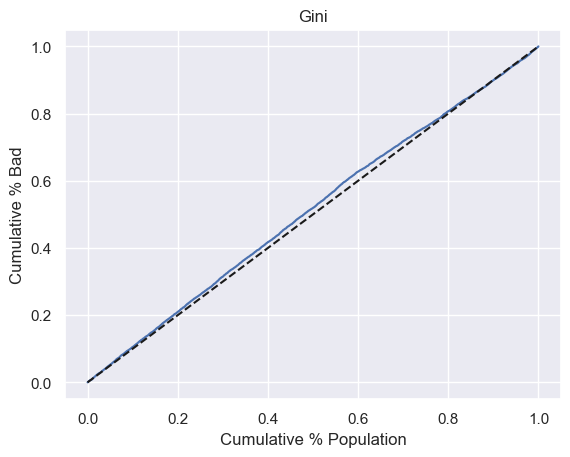

In [81]:
# plot Gini

# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])

# We plot a seconary diagonal line, with dashed line style.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')

plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [82]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.02512768617142047

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

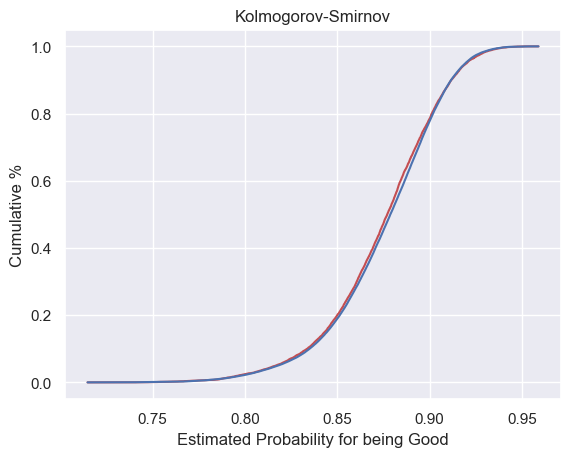

In [83]:
# Plot KS

# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')

# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
 
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [84]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.03143110000607674

# Applying the PD Model

## Calculating PD of individual accounts

In [87]:
pd.options.display.max_columns = None

In [88]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [89]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.561167e+00,NaN
1,grade:A,2.672909e-01,0.000000e+00
2,grade:B,4.869792e-02,5.583298e-30
3,grade:C,3.336132e-01,0.000000e+00
4,grade:D,3.297053e-03,4.521684e-01
5,grade:E,7.204700e-02,7.125006e-62
6,grade:F,-8.311421e-02,2.012711e-81
7,home_ownership:OWN,4.808191e-02,1.663636e-25
8,home_ownership:MORTGAGE,8.527337e-02,7.500572e-73
9,addr_state:NM_VA,-1.529037e-01,1.725186e-226


In [90]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [93]:
df_ref_categories = pd.DataFrame(ref_categories,columns = ['Feature name'])
df_ref_categories['coefficient'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,coefficient,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [97]:
df_scorecard = pd.concat([summary_table,df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values,coefficient
0,0,Intercept,2.561167e+00,NaN,NaN
1,1,grade:A,2.672909e-01,0.000000e+00,NaN
2,2,grade:B,4.869792e-02,5.583298e-30,NaN
3,3,grade:C,3.336132e-01,0.000000e+00,NaN
4,4,grade:D,3.297053e-03,4.521684e-01,NaN
5,5,grade:E,7.204700e-02,7.125006e-62,NaN
6,6,grade:F,-8.311421e-02,2.012711e-81,NaN
7,7,home_ownership:OWN,4.808191e-02,1.663636e-25,NaN
8,8,home_ownership:MORTGAGE,8.527337e-02,7.500572e-73,NaN
9,9,addr_state:NM_VA,-1.529037e-01,1.725186e-226,NaN


In [100]:
df_scorecard.drop(['coefficient'],axis=1,inplace=True)

In [101]:
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,2.561167e+00,NaN
1,1,grade:A,2.672909e-01,0.000000e+00
2,2,grade:B,4.869792e-02,5.583298e-30
3,3,grade:C,3.336132e-01,0.000000e+00
4,4,grade:D,3.297053e-03,4.521684e-01
5,5,grade:E,7.204700e-02,7.125006e-62
6,6,grade:F,-8.311421e-02,2.012711e-81
7,7,home_ownership:OWN,4.808191e-02,1.663636e-25
8,8,home_ownership:MORTGAGE,8.527337e-02,7.500572e-73
9,9,addr_state:NM_VA,-1.529037e-01,1.725186e-226


In [102]:
df_scorecard['Original Feature Name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [103]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original Feature Name
0,0,Intercept,2.561167e+00,NaN,Intercept
1,1,grade:A,2.672909e-01,0.000000e+00,grade
2,2,grade:B,4.869792e-02,5.583298e-30,grade
3,3,grade:C,3.336132e-01,0.000000e+00,grade
4,4,grade:D,3.297053e-03,4.521684e-01,grade
5,5,grade:E,7.204700e-02,7.125006e-62,grade
6,6,grade:F,-8.311421e-02,2.012711e-81,grade
7,7,home_ownership:OWN,4.808191e-02,1.663636e-25,home_ownership
8,8,home_ownership:MORTGAGE,8.527337e-02,7.500572e-73,home_ownership
9,9,addr_state:NM_VA,-1.529037e-01,1.725186e-226,addr_state


In [104]:
min_score = 300
max_score = 850

In [106]:
df_scorecard.groupby('Original Feature Name')['Coefficients'].min()

Original Feature Name
Intercept                      2.561167
acc_now_delinq                 0.022951
addr_state                    -0.152904
annual_inc                    -0.125773
dti                           -0.160419
emp_length                    -0.055644
grade                         -0.083114
home_ownership                 0.048082
initial_list_status            0.017212
inq_last_6mths                -0.040258
int_rate                      -0.034281
mths_since_earliest_cr_line   -0.040078
mths_since_issue_d            -0.060736
mths_since_last_delinq        -0.736459
mths_since_last_record        -0.427587
purpose                       -0.016534
term                           0.000621
verification_status           -0.004582
Name: Coefficients, dtype: float64

In [107]:
min_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].min().sum()
min_sum_coef

0.7116648688301563

In [109]:
max_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].max().sum()
max_sum_coef

3.3558898979967187

In [110]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original Feature Name,Score - Calculation
0,0,Intercept,2.561167e+00,NaN,Intercept,5.327239e+02
1,1,grade:A,2.672909e-01,0.000000e+00,grade,5.559662e+01
2,2,grade:B,4.869792e-02,5.583298e-30,grade,1.012919e+01
3,3,grade:C,3.336132e-01,0.000000e+00,grade,6.939169e+01
4,4,grade:D,3.297053e-03,4.521684e-01,grade,6.857884e-01
5,5,grade:E,7.204700e-02,7.125006e-62,grade,1.498581e+01
6,6,grade:F,-8.311421e-02,2.012711e-81,grade,-1.728779e+01
7,7,home_ownership:OWN,4.808191e-02,1.663636e-25,home_ownership,1.000106e+01
8,8,home_ownership:MORTGAGE,8.527337e-02,7.500572e-73,home_ownership,1.773690e+01
9,9,addr_state:NM_VA,-1.529037e-01,1.725186e-226,addr_state,-3.180404e+01


In [116]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\scarl\AppData\Local\Temp\ipykernel_1932\1263832758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original Feature Name,Score - Calculation
0,0,Intercept,2.561167e+00,NaN,Intercept,6.846973e+02
1,1,grade:A,2.672909e-01,0.000000e+00,grade,5.559662e+01
2,2,grade:B,4.869792e-02,5.583298e-30,grade,1.012919e+01
3,3,grade:C,3.336132e-01,0.000000e+00,grade,6.939169e+01
4,4,grade:D,3.297053e-03,4.521684e-01,grade,6.857884e-01
5,5,grade:E,7.204700e-02,7.125006e-62,grade,1.498581e+01
6,6,grade:F,-8.311421e-02,2.012711e-81,grade,-1.728779e+01
7,7,home_ownership:OWN,4.808191e-02,1.663636e-25,home_ownership,1.000106e+01
8,8,home_ownership:MORTGAGE,8.527337e-02,7.500572e-73,home_ownership,1.773690e+01
9,9,addr_state:NM_VA,-1.529037e-01,1.725186e-226,addr_state,-3.180404e+01


In [112]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\scarl\AppData\Local\Temp\ipykernel_1932\1263832758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original Feature Name,Score - Calculation
0,0,Intercept,2.561167e+00,NaN,Intercept,6.846973e+02
1,1,grade:A,2.672909e-01,0.000000e+00,grade,5.559662e+01
2,2,grade:B,4.869792e-02,5.583298e-30,grade,1.012919e+01
3,3,grade:C,3.336132e-01,0.000000e+00,grade,6.939169e+01
4,4,grade:D,3.297053e-03,4.521684e-01,grade,6.857884e-01
5,5,grade:E,7.204700e-02,7.125006e-62,grade,1.498581e+01
6,6,grade:F,-8.311421e-02,2.012711e-81,grade,-1.728779e+01
7,7,home_ownership:OWN,4.808191e-02,1.663636e-25,home_ownership,1.000106e+01
8,8,home_ownership:MORTGAGE,8.527337e-02,7.500572e-73,home_ownership,1.773690e+01
9,9,addr_state:NM_VA,-1.529037e-01,1.725186e-226,addr_state,-3.180404e+01


In [117]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original Feature Name,Score - Calculation,Score - Preliminary
0,0,Intercept,2.561167e+00,NaN,Intercept,6.846973e+02,685.0
1,1,grade:A,2.672909e-01,0.000000e+00,grade,5.559662e+01,56.0
2,2,grade:B,4.869792e-02,5.583298e-30,grade,1.012919e+01,10.0
3,3,grade:C,3.336132e-01,0.000000e+00,grade,6.939169e+01,69.0
4,4,grade:D,3.297053e-03,4.521684e-01,grade,6.857884e-01,1.0
5,5,grade:E,7.204700e-02,7.125006e-62,grade,1.498581e+01,15.0
6,6,grade:F,-8.311421e-02,2.012711e-81,grade,-1.728779e+01,-17.0
7,7,home_ownership:OWN,4.808191e-02,1.663636e-25,home_ownership,1.000106e+01,10.0
8,8,home_ownership:MORTGAGE,8.527337e-02,7.500572e-73,home_ownership,1.773690e+01,18.0
9,9,addr_state:NM_VA,-1.529037e-01,1.725186e-226,addr_state,-3.180404e+01,-32.0


In [118]:
min_sum_score_prel = df_scorecard.groupby('Original Feature Name')['Score - Preliminary'].min().sum()
min_sum_score_prel

302.0

In [120]:
max_sum_score_prel = df_scorecard.groupby('Original Feature Name')['Score - Preliminary'].max().sum()
max_sum_score_prel

850.0

## Calculating Credit Score

In [121]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [122]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original Feature Name,Score - Calculation,Score - Preliminary
0,0,Intercept,2.561167e+00,NaN,Intercept,6.846973e+02,685.0
1,1,grade:A,2.672909e-01,0.000000e+00,grade,5.559662e+01,56.0
2,2,grade:B,4.869792e-02,5.583298e-30,grade,1.012919e+01,10.0
3,3,grade:C,3.336132e-01,0.000000e+00,grade,6.939169e+01,69.0
4,4,grade:D,3.297053e-03,4.521684e-01,grade,6.857884e-01,1.0
5,5,grade:E,7.204700e-02,7.125006e-62,grade,1.498581e+01,15.0
6,6,grade:F,-8.311421e-02,2.012711e-81,grade,-1.728779e+01,-17.0
7,7,home_ownership:OWN,4.808191e-02,1.663636e-25,home_ownership,1.000106e+01,10.0
8,8,home_ownership:MORTGAGE,8.527337e-02,7.500572e-73,home_ownership,1.773690e+01,18.0
9,9,addr_state:NM_VA,-1.529037e-01,1.725186e-226,addr_state,-3.180404e+01,-32.0


In [123]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [124]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [125]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [126]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [127]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,False,False,True,False,False,False,False,True,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,False,False,0,1,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,False,0,0,True,0,True,0,1,0,0,0,0,1,0,0,0,0
288564,1,False,False,False,False,True,False,False,True,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,False,0,0,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,False,0,0,True,0,False,0,0,0,1,0,0,1,0,0,1,0
213591,1,False,False,True,False,False,False,False,True,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,False,True,0,0,False,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,0,0,True,0,True,0,0,0,0,0,0,1,0,0,0,0
263083,1,False,False,True,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,True,0,0,True,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,0,0,False,0,False,0,0,0,0,1,0,1,0,0,0,0
165001,1,True,False,False,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,False,True,0,0,False,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,0,0,True,0,True,0,0,0,0,0,0,1,0,0,0,0


In [129]:
scorecard_scores = df_scorecard['Score - Preliminary']

In [130]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [131]:
scorecard_scores.shape

(102,)

In [132]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [133]:
scorecard_scores.shape

(102, 1)

In [134]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [135]:
y_scores.head()

,0
362514,NaN
288564,NaN
213591,NaN
263083,NaN
165001,NaN


In [136]:
y_scores.tail()

,0
115,NaN
296284,NaN
61777,NaN
91763,NaN
167512,NaN
